In [22]:
from pandas import read_csv, concat, DataFrame
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import figure, savefig
from ds_charts import bar_chart, get_variable_types
from sklearn.impute import SimpleImputer
from numpy import nan

In [23]:

register_matplotlib_converters()
file = 'set2'
filename = "ew_data/set2_outliers.csv"
data = read_csv(filename, parse_dates=True, infer_datetime_format=True)

,FID,City_EN,Prov_EN,GbCity,GbProv,Field_1,ALARM,CO_Mean,CO_Min,CO_Max,...,PM10_Min,PM10_Max,PM10_Std,SO2_Mean,SO2_Min,SO2_Max,SO2_Std,hour,day,year
count,169273.000000,169273,169273,169273.0,169273.000000,152211.000000,169273.000000,161488.000000,161495.000000,161482.000000,...,161582.000000,161577.000000,161569.000000,161556.000000,161551.000000,161540.000000,161556.000000,169273.000000,169273.000000,169273.000000
unique,NaN,371,31,755.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Yichun,Shandong,6325.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,898,13470,276.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,38697.082228,NaN,NaN,NaN,39.986737,170.000000,0.899760,0.751966,0.529502,1.121080,...,37.586788,107.798474,19.825865,10.465253,6.384253,19.951213,3.653267,6.024499,15.160356,2020.184855
std,120353.768401,NaN,NaN,NaN,14.543213,97.860766,0.300321,0.359572,0.246906,0.678756,...,41.912874,152.320738,36.521100,7.562375,3.548584,21.915281,5.435964,3.573213,9.119190,0.388181
min,0.000000,NaN,NaN,NaN,11.000000,1.000000,0.000000,0.100000,0.100000,0.100000,...,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2020.000000
25%,94.000000,NaN,NaN,NaN,32.000000,85.000000,1.000000,0.529055,0.380000,0.710000,...,15.000000,52.000000,8.336562,6.000000,4.000000,8.000000,0.877971,3.000000,7.000000,2020.000000
50%,188.000000,NaN,NaN,NaN,41.000000,170.000000,1.000000,0.680000,0.500000,0.950000,...,28.000000,81.000000,13.335156,8.375000,6.000000,13.000000,1.914401,6.000000,15.000000,2020.000000
75%,282.000000,NaN,NaN,NaN,51.000000,255.000000,1.000000,0.879167,0.630000,1.300000,...,48.000000,125.000000,21.601464,12.375000,8.000000,23.000000,4.182470,9.000000,23.000000,2020.000000


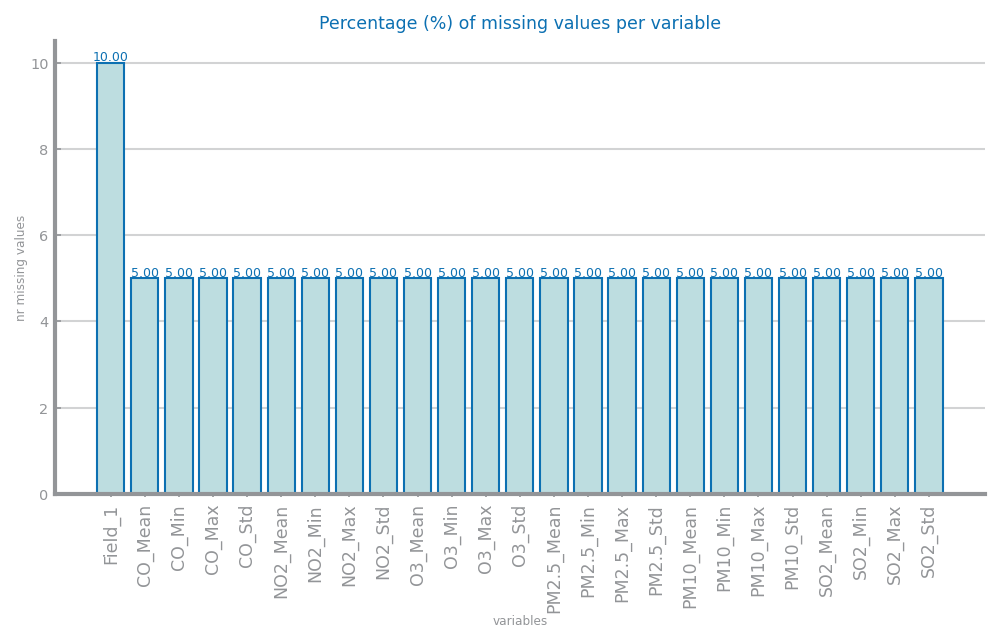

In [24]:
mv = {}
figure(figsize=(8,4))
n_rows = len(data)
for var in data:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = round((nr/n_rows) * 100,0)

bar_chart(list(mv.keys()), list(mv.values()), title='Percentage (%) of missing values per variable', xlabel='variables', ylabel='nr missing values', rotation=True)
savefig(f'images/{file}_missing_values_number.png')
data.describe(include='all')


## We will NOT discard any columns

## See rows with a lot of missing values

In [25]:

n_columns = len(data.columns)
n_records = len(data)
qty_of_nuls = n_columns
statistics = []
#data_only_missing_columns = data.drop(columns=['FID','City_EN','Prov_EN','GbCity','GbProv'])
for n_columns_nul in range(qty_of_nuls, 0, -1):
    data_tmp = data[(data.isnull().sum(axis=1) >= n_columns_nul)]
    percentage_columns = round(n_columns_nul*100/n_columns)
    percentage_rows = len(data_tmp)*100/n_records
    print('>= %d, Missing: %d (%.2f%%)' % (n_columns_nul, len(data_tmp), percentage_rows))


>= 34, Missing: 0 (0.00%)
>= 33, Missing: 0 (0.00%)
>= 32, Missing: 0 (0.00%)
>= 31, Missing: 0 (0.00%)
>= 30, Missing: 0 (0.00%)
>= 29, Missing: 0 (0.00%)
>= 28, Missing: 0 (0.00%)
>= 27, Missing: 0 (0.00%)
>= 26, Missing: 0 (0.00%)
>= 25, Missing: 1539 (0.91%)
>= 24, Missing: 7640 (4.51%)
>= 23, Missing: 7640 (4.51%)
>= 22, Missing: 7640 (4.51%)
>= 21, Missing: 7641 (4.51%)
>= 20, Missing: 7641 (4.51%)
>= 19, Missing: 7641 (4.51%)
>= 18, Missing: 7642 (4.51%)
>= 17, Missing: 7642 (4.51%)
>= 16, Missing: 7642 (4.51%)
>= 15, Missing: 7642 (4.51%)
>= 14, Missing: 7642 (4.51%)
>= 13, Missing: 7643 (4.52%)
>= 12, Missing: 7744 (4.57%)
>= 11, Missing: 7744 (4.57%)
>= 10, Missing: 7744 (4.57%)
>= 9, Missing: 7745 (4.58%)
>= 8, Missing: 7746 (4.58%)
>= 7, Missing: 7746 (4.58%)
>= 6, Missing: 7747 (4.58%)
>= 5, Missing: 7807 (4.61%)
>= 4, Missing: 7902 (4.67%)
>= 3, Missing: 7919 (4.68%)
>= 2, Missing: 7947 (4.69%)
>= 1, Missing: 23450 (13.85%)


## Drop rows with 2 or more missing values

In [26]:
data_drop_rows = data
for column in data.columns[8:]:
       data_drop_rows = data_drop_rows[data_drop_rows[column].notna()]

number_rows_lost = len(data) - len(data_drop_rows)
percentage_rows_lost = number_rows_lost / len(data)
print(number_rows_lost)
print("Lost " + str(round(percentage_rows_lost * 100,2)) + "% of the records")

8007
Lost 4.73% of the records


,FID,City_EN,Prov_EN,GbCity,GbProv,Field_1,ALARM,CO_Mean,CO_Min,CO_Max,...,PM10_Min,PM10_Max,PM10_Std,SO2_Mean,SO2_Min,SO2_Max,SO2_Std,hour,day,year
count,161266.000000,161266,161266,161266.0,161266.000000,145827.000000,161266.000000,161262.000000,161266.000000,161266.000000,...,161266.000000,161266.000000,161266.000000,161266.000000,161266.000000,161266.000000,161266.000000,161266.000000,161266.000000,161266.000000
unique,NaN,361,31,731.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Suzhou,Shandong,659001.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,898,12414,276.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36865.666613,NaN,NaN,NaN,39.689835,170.268489,0.895297,0.751584,0.529343,1.120672,...,37.439894,106.959055,19.701174,10.451583,6.381519,19.936347,3.637964,6.047369,15.187076,2020.177341
std,117909.135693,NaN,NaN,NaN,14.488142,98.047261,0.306171,0.358719,0.246560,0.676923,...,39.673211,140.372112,35.200988,7.487007,3.545006,21.821698,5.297523,3.569165,9.106313,0.381958
min,0.000000,NaN,NaN,NaN,11.000000,1.000000,0.000000,0.100000,0.100000,0.100000,...,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2020.000000
25%,91.000000,NaN,NaN,NaN,32.000000,85.000000,1.000000,0.528750,0.380000,0.710000,...,15.000000,52.000000,8.331979,6.000000,4.000000,8.000000,0.877971,3.000000,7.000000,2020.000000
50%,184.000000,NaN,NaN,NaN,41.000000,170.000000,1.000000,0.679583,0.500000,0.950000,...,28.000000,81.000000,13.328352,8.375000,6.000000,13.000000,1.913955,6.000000,15.000000,2020.000000
75%,278.000000,NaN,NaN,NaN,51.000000,256.000000,1.000000,0.879167,0.630000,1.300000,...,48.000000,124.000000,21.590823,12.375000,8.000000,23.000000,4.179979,9.000000,23.000000,2020.000000


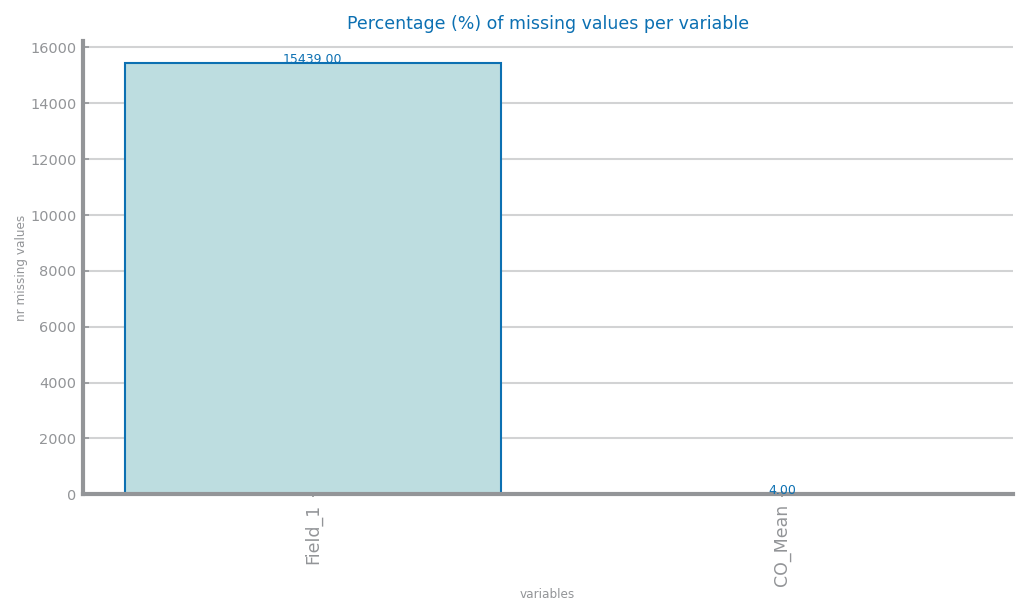

In [27]:
mv = {}
figure(figsize=(8,4))
n_rows = len(data_drop_rows)
for var in data_drop_rows:
    nr = data_drop_rows[var].isna().sum()
    if nr > 0:
        mv[var] = round(nr)

bar_chart(list(mv.keys()), list(mv.values()), title='Percentage (%) of missing values per variable', xlabel='variables', ylabel='nr missing values', rotation=True)
savefig(f'images/{file}_missing_values_number_drop_rows.png')
data_drop_rows.describe(include='all')

In [28]:
data_drop_rows.to_csv(f'ew_data/{file}_mv.csv', index=False)